# Census Self Response Graphics
##### Ivana Moore

###### Import necessary libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import seaborn as sns

###### Read in the 2010 census self response file and remove incomplete data 

In [89]:
nyc = pd.read_excel('nycounty.xlsx')
nyc.drop(nyc[nyc['MailReturnRateCen2010']>100].index, inplace=True)
nyc.drop(nyc[nyc['LowResponseScore']>100].index, inplace=True)

###### Read in the 3/30 2020 Census Self Response File, Create Harlem-specific tract list

In [90]:
self_response_2020 = pd.read_csv('nyc_self_response.csv')

In [91]:
harlem_tracts = [23700, 23300, 23501, 23502, 22900, 23100, 23600, 22500, 23400, 25900, 22700, 22301, 23200, 22302, 22102, 21900, 21703, 23000, 21400, 22800, 21500, 22600, 21200, 21303, 21000, 20901, 22400, 20800, 25700, 20600, 22200, 20000, 24200, 22000, 20102, 19800, 21800, 19600, 19702, 19000, 19200, 19400, 21600, 18400, 18600, 18200, 18800, 17402, 17401, 18000, 17200, 16800, 17000, 24000, 16600, 16400, 16002, 15802, 16200, 15602]

## 2010 Final Census Self-Response Rates

Getting 2010 Census Self-Response Final Rates for each group

In [92]:
high_response_2010 =nyc[nyc['LowResponseScore']<25]['MailReturnRateCen2010'].tolist()

black_2010 = nyc[nyc['PctBlackAloneOrCombo_TotPopDenom']>.25]['MailReturnRateCen2010'].tolist()
    
latinx_2010 =  nyc[nyc['PctHispanic_TotPopDenom']>.25]['MailReturnRateCen2010'].tolist()

asian_2010 =  nyc[nyc['PctAsianAloneOrCombo_TotPopDenom']>.25]['MailReturnRateCen2010'].tolist()

lim_eng_2010 =  nyc[nyc['PctLEPHHs_TotHHDenom']>.25]['MailReturnRateCen2010'].tolist()

foreign_pop_2010 =  nyc[nyc['PctTotPopBornOutUS_TotPopDenom']>.25]['MailReturnRateCen2010'].tolist()

poverty_2010 = nyc[nyc['PctPoverty_Less100_PovDenom']>.25]['MailReturnRateCen2010'].tolist()

no_internet_2010 =  nyc[nyc['PctNoInternet_TotHHDenom']>.25]['MailReturnRateCen2010'].tolist()

def create_geoid_harlem_2010(tracts):
    for i in range(0, len(tracts)):
        tracts[i] = str('360610') + str(tracts[i])
    return tracts

harlem_tracts_2010 = create_geoid_harlem_2010(harlem_tracts)

harlem_list_2010 = []
for i in harlem_tracts_2010:
    try:
        harlem_list_2010.append(nyc[nyc['GEOIDtxt']==int(i)]['MailReturnRateCen2010'].values[0])
    except:
        harlem_list_2010.append(np.nan)



Create DataFrame

In [93]:
group_names_2010 = np.array(['Black', 'Latinx', 'Asian', 'Limited English','Foreign-Born','Poverty','No Internet', 'High Responders','Harlem'])
group_labels_2010 = np.repeat(group_names_2010,[len(black_2010), len(latinx_2010), len(asian_2010), len(lim_eng_2010), len(foreign_pop_2010), len(poverty_2010), len(no_internet_2010), len(high_response_2010), len(harlem_list_2010)],axis=0)
census_2010= pd.DataFrame([black_2010]).T.append(latinx_2010).append(asian_2010).append(lim_eng_2010).append(foreign_pop_2010).append(poverty_2010).append(no_internet_2010).append(high_response_2010).append(harlem_list_2010)
census_2010['group'] = group_labels_2010
census_2010.columns=['SelfResponse','Group']

Create the 2010 Chart

Text(0.5, 1.0, '2010 Self Response Rate for Tracts With at Least 25% of Population in Demographic Group')

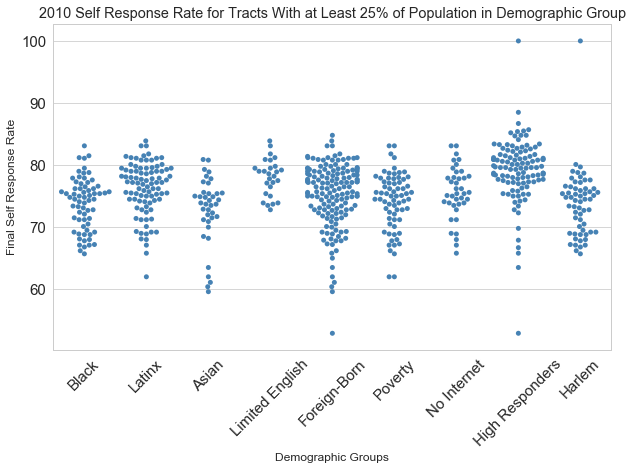

In [94]:
plt.figure(figsize=(10,6))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.set_style("whitegrid")
ax = sns.swarmplot(x='Group', y='SelfResponse', data = census_2010,color ='steelblue')
plt.xticks(rotation=45)
plt.xlabel('Demographic Groups')
plt.ylabel('Final Self Response Rate')
plt.title('2010 Self Response Rate for Tracts With at Least 25% of Population in Demographic Group')

## Census 2020 Self-Response Rates

In [95]:
black_2020 = nyc[nyc['PctBlackAloneOrCombo_TotPopDenom']>.25]['GEOIDtxt'].tolist()
latinx_2020 =  nyc[nyc['PctHispanic_TotPopDenom']>.25]['GEOIDtxt'].tolist()
asian_2020 =  nyc[nyc['PctAsianAloneOrCombo_TotPopDenom']>.25]['GEOIDtxt'].tolist()
lim_eng_2020 = nyc[nyc['PctLEPHHs_TotHHDenom']>.25]['GEOIDtxt'].tolist()
foreign_pop_2020 = nyc[nyc['PctTotPopBornOutUS_TotPopDenom']>.25]['GEOIDtxt'].tolist()
poverty_2020 = nyc[nyc['PctPoverty_Less100_PovDenom']>.25]['GEOIDtxt'].tolist()
no_internet_2020 = nyc[nyc['PctNoInternet_TotHHDenom']>.25]['GEOIDtxt'].tolist()
high_response_2020 =nyc[nyc['LowResponseScore']<25]['GEOIDtxt'].tolist()



In [96]:
def create_geoid(tracts):
    for i in range(0, len(tracts)):
        tracts[i] = str('1400000US') + str(tracts[i])
    return tracts

def create_geoid_harlem_2020(tracts):
    for i in range(0, len(tracts)):
        tracts[i] = str('1400000US360610') + str(tracts[i])
    return tracts

harlem_2020 = create_geoid(harlem_tracts)
black_2020 = create_geoid(black_2020)
latinx_2020 = create_geoid(latinx_2020)
asian_2020 = create_geoid(asian_2020)
lim_eng_2020 = create_geoid(lim_eng_2020)
foreign_pop_2020 = create_geoid(foreign_pop_2020)
poverty_2020 = create_geoid(poverty_2020)
no_internet_2020 = create_geoid(no_internet_2020)
high_response_2020 = create_geoid(high_response_2020)

In [97]:
def get_response(tract_list):
    empty_list=[]
    for i in tract_list:
        try:
            self_response_2020[self_response_2020.GEO_ID==i]['CRRALL'].values[0]
            empty_list.append(self_response_2020[self_response_2020.GEO_ID==i]['CRRALL'].values[0])
        except:
            empty_list.append(np.nan)
    return empty_list
                          
black_response = get_response(black_2020)
latinx_response = get_response(latinx_2020)
asian_response = get_response(asian_2020)
lim_eng_response = get_response(lim_eng_2020)
foreign_pop_response = get_response(foreign_pop_2020)
poverty_response = get_response(poverty_2020)
no_internet_response = get_response(no_internet_2020)
high_response_response = get_response(high_response_2020)
harlem_response = get_response(harlem_2020)

In [98]:
group_names_2020 = np.array(['Black', 'Latinx', 'Asian', 'Limited English','Foreign-Born','Poverty','No Internet', 'High Responders', 'Harlem'])
group_labels_2020 = np.repeat(group_names_2020,[len(black_response), len(latinx_response), len(asian_response), len(lim_eng_response), len(foreign_pop_response), len(poverty_response), len(no_internet_response), len(high_response_response), len(harlem_response)],axis=0)
census_2020 = pd.DataFrame([black_response]).T.append(latinx_response).append(asian_response).append(lim_eng_response).append(foreign_pop_response).append(poverty_response).append(no_internet_response).append(high_response_response).append(harlem_response)
census_2020['group'] = group_labels_2020
census_2020.columns=['SelfResponse','Group']



Text(0.5, 1.0, '2020 Self Response Rate for Tracts With at Least 25% of Population in Demographic Group')

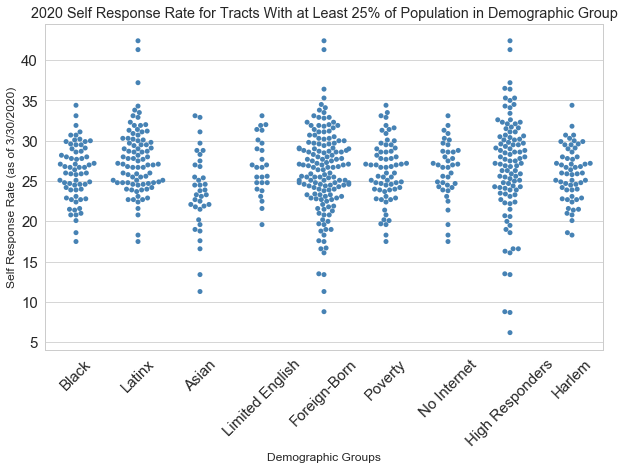

In [99]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.set_style("whitegrid")
ax = sns.swarmplot(x='Group', y='SelfResponse', data = census_2020, color ='steelblue')
plt.xticks(rotation=45)
plt.xlabel('Demographic Groups')
plt.ylabel('Self Response Rate (as of 3/30/2020)')
plt.title('2020 Self Response Rate for Tracts With at Least 25% of Population in Demographic Group')

